In [17]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
#Loading data
data = load_breast_cancer()

In [53]:
#Predictors variables and target variable store in X & y
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['diagnosis'])

In [54]:
#Concatenate X & y
df = pd.concat([X,y], axis = 1)

In [55]:
#View the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [90]:
#X & y data split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(512, 30) (512, 1)
(57, 30) (57, 1)


In [91]:
#Standardization of the X_train and X_test
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [92]:
#Importing keras
import keras 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [104]:
#Creating layers of ANN

#Calling function
classifier = Sequential()

#Adding input and first hidden layer  
classifier.add(Dense(units = 16, 
                     kernel_initializer='uniform',
                     activation = 'relu',
                     input_dim = 30))
#Adding second hidden layer
classifier.add(Dense(16, # mentioning number of hidden layer (total variables 31/2)
                     kernel_initializer = 'uniform', # using uniform distribution for adjusting weights 
                     activation = 'relu')) #Activation function in hidden layer if x>0 then x else 0 (neuron die if 0)
#Adding second output layer
classifier.add(Dense(1, # mentioning number of output layer (output will be either 0 or 1)
                     kernel_initializer = 'uniform', # using uniform distribution for adjusting weights 
                     activation = 'sigmoid')) #Activation function in output layer probability of 0 & 1

In [97]:
#Configuring model training with optimization
classifier.compile(optimizer='Adam', #Giving a name of the optimizer as per the optimizers list. This optimizer generalize the weights of the model and find best global minimum which will reduce the loss function
                   loss='binary_crossentropy', # Using binary due to our output are in the form of 0 or 1
                   metrics=['accuracy']) # Showing accuracy on each iteration

In [98]:
#Training the model on the data
classifier.fit(X_train_sc,y_train, batch_size=200, epochs=250)

Epoch 1/250
3/3 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.6527
Epoch 2/250
3/3 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.6401
Epoch 3/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.6666
Epoch 4/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.6927
Epoch 5/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.7202
Epoch 6/250
3/3 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.7714
Epoch 7/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.8086
Epoch 8/250
3/3 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.8776
Epoch 9/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.9044
Epoch 10/250
3/3 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.9150
Epoch 11/250
3/3 [===========

In [129]:
#Prediction on the model
y_pred = classifier.predict(X_test_sc)

In [133]:
#Changing probability value as 1 or 0 if value is greater than 0.5 mark as 1 and if value is less than 0.5 mark as 0
for i,j in enumerate(y_pred):
  if j>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

#Converting float into integer
y_pred = y_pred.astype(int)

In [134]:
#Checking data
y_pred[0:5]

array([[0],
       [1],
       [0],
       [1],
       [1]])

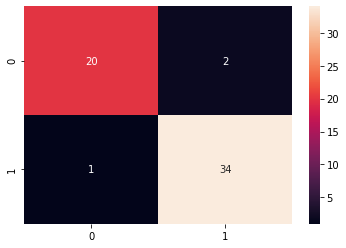

In [136]:
#Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True);